In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mnd_data = pd.read_csv(mouse_drug_data_to_load)
ct_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
raw_data = mnd_data.merge(ct_data)

# Display the data table for preview
print(raw_data)


     Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        f234  Stelasyn          0           45.000000                 0
1        f234  Stelasyn          5           47.313491                 0
2        f234  Stelasyn         10           47.904324                 0
3        f234  Stelasyn         15           48.735197                 1
4        f234  Stelasyn         20           51.112713                 2
...       ...       ...        ...                 ...               ...
1901     j235   Placebo          0           45.000000                 0
1902     j235   Placebo          5           46.588820                 0
1903     j235   Placebo         10           48.018788                 1
1904     j235   Placebo         15           51.161138                 1
1905     j235   Placebo         20           52.942902                 1

[1906 rows x 5 columns]


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_sizes = raw_data.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_sizes_df = pd.DataFrame(tumor_sizes)
tumor_sizes_df.reset_index(inplace=True)

# Preview DataFrame
tumor_sizes_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumors = raw_data.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
se_tumors_df = pd.DataFrame(se_tumors)
se_tumors_df.reset_index(inplace=True)

# Preview DataFrame
se_tumors_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
progress_df = tumor_sizes_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
progress_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


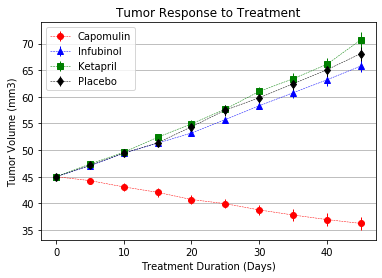

In [5]:
# Generate the Plot (with Error Bars)
line_data = {'Capomulin': 'o--r', 
             'Infubinol': 'b--^', 
             'Ketapril': 'g--s', 
             'Placebo': 'k--d'}

def common_plot(title, y_label):
    plt.title(title)
    plt.xlabel("Treatment Duration (Days)")
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(b=True,axis='y')

def errorline(df, data, k, v):
    line = plt.errorbar(df.index, df[k], data[k], fmt=v, lw=0.5, elinewidth=1, barsabove=False)
    line.set_label(k)
    
for k, v in line_data.items():
    errorline(progress_df, se_tumors, k, v)

common_plot("Tumor Response to Treatment", "Tumor Volume (mm3)")

# Save the Figure
file_name = os.path.join('.', 'Figures', 'tumor_response.png')
plt.savefig(file_name)

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_sites = raw_data.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()

# Convert to DataFrame
meta_sites_df = pd.DataFrame(meta_sites)
meta_sites_df.reset_index(inplace=True)

# Preview DataFrame
meta_sites_df


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_sites = raw_data.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()

# Convert to DataFrame
se_sites_df = pd.DataFrame(se_sites)
se_sites_df.reset_index(inplace=True)

# Preview DataFrame
se_sites_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [8]:
# Minor Data Munging to Re-Format the Data Frames
progress_2_df = meta_sites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
progress_2_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


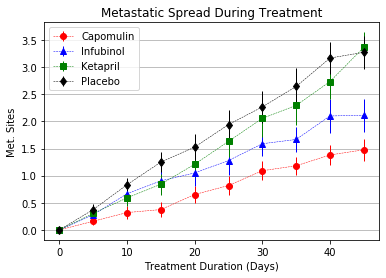

In [9]:
# Generate the Plot (with Error Bars)
for k, v in line_data.items():
    errorline(progress_2_df, se_sites, k, v)

common_plot("Metastatic Spread During Treatment", "Met. Sites")

# Save the Figure
file_name = os.path.join('.', 'Figures', 'tumor_spread.png')
plt.savefig(file_name)

plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_counts = raw_data.groupby(["Drug", "Timepoint"])['Mouse ID'].count()

# Convert to DataFrame
mice_df = pd.DataFrame(mice_counts)
mice_df.rename(columns={"Mouse ID": "# of Mice"}, inplace = True)
mice_df.reset_index(inplace=True)

# Preview DataFrame
mice_df

,Drug,Timepoint,# of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [11]:
# Minor Data Munging to Re-Format the Data Frames
progress_3_df = mice_df.pivot(index='Timepoint',columns='Drug',values='# of Mice')

# Preview that Reformatting worked
progress_3_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


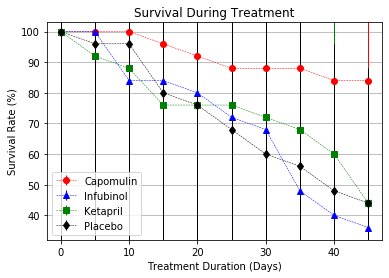

In [12]:
# Generate the Plot (Accounting for percentages)
for k, v in line_data.items():
    k_perc = 100 * progress_3_df[k] // progress_3_df[k][0]
    k_perc_df = pd.DataFrame(k_perc)
    errorline(k_perc_df, k_perc_df, k, v)

plt.xlim(right = 47)
plt.xlim(left = -2)
plt.ylim(top = 103)
plt.ylim(bottom = 32)
common_plot("Survival During Treatment", "Survival Rate (%)")

# Save the Figure
file_name = os.path.join('.', 'Figures', 'survivial_rate.png')
plt.savefig(file_name)

plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [29]:
# Calculate the percent changes for each drug
perc_change = {}
for drug in progress_df.columns:
    perc_change[drug] = 1.0 - (progress_df.at[45, drug] / progress_df.at[0, drug])

# Display the data to confirm
perc_change

{'Capomulin': 0.19475302667894168,
 'Ceftamin': -0.42516491855897454,
 'Infubinol': -0.4612347172785187,
 'Ketapril': -0.5702879468660607,
 'Naftisol': -0.5392334713476923,
 'Placebo': -0.5129796048315152,
 'Propriva': -0.4724117486320636,
 'Ramicane': 0.22320900462766669,
 'Stelasyn': -0.5208513428789903,
 'Zoniferol': -0.4657975086509525}

In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)